In [22]:
import glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import xarray as xr
import xclim as xc
import numpy as np
import cmocean
import geopandas as gp

from unseen import fileio

## Shapefile

In [2]:
river_regions_file = '/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/river_regions/river_regions.shp'
river_regions = gp.read_file(river_regions_file)

In [8]:
nec_river_regions = river_regions[river_regions['Division'] == 'North East Coast']
nec_river_regions

RivRegName RivRegNum          Division  \
62             JARDINE RIVER        23  North East Coast   
63              BARRON RIVER        10  North East Coast   
64   MULGRAVE-RUSSELL RIVERS        11  North East Coast   
65           JOHNSTONE RIVER        12  North East Coast   
66       TULLY-MURRAY RIVERS        13  North East Coast   
67            CARDWELL COAST        14  North East Coast   
68       HINCHINBROOK ISLAND        15  North East Coast   
69             HERBERT RIVER        16  North East Coast   
70               BLACK RIVER        17  North East Coast   
71                ROSS RIVER        18  North East Coast   
72            HAUGHTON RIVER        19  North East Coast   
73       OLIVE-PASCOE RIVERS         2  North East Coast   
74            BURDEKIN RIVER        20  North East Coast   
75                 DON RIVER        21  North East Coast   
76          PROSERPINE RIVER        22  North East Coast   
77           O'CONNELL RIVER        24  North East Coast   
78             PIONEER RIVER        25  North East Coast   
79               PLANE CREEK        26  North East Coast   
80            LOCKHART RIVER         3  North East Coast   
81             STEWART RIVER         4  North East Coast   
82            NORMANBY RIVER         5  North East Coast   
83             JEANNIE RIVER         6  North East Coast   
84           ENDEAVOUR RIVER         7  North East Coast   
85            DAINTREE RIVER         8  North East Coast   
86             MOSSMAN RIVER         9  North East Coast   
88                STYX RIVER        27  North East Coast   
89          SHOALWATER CREEK        28  North East Coast   
90          WATER PARK CREEK        29  North East Coast   
91       FITZROY RIVER (QLD)        30  North East Coast   
92             CURTIS ISLAND        32  North East Coast   
93            CALLIOPE RIVER        31  North East Coast   
94               BOYNE RIVER        33  North East Coast   
95              BAFFLE CREEK        34  North East Coast   
96               KOLAN RIVER        35  North East Coast   
97             BURNETT RIVER        36  North East Coast   
98              BURRUM RIVER        37  North East Coast   
99          MARY RIVER (QLD)        38  North East Coast   
100            FRASER ISLAND        39  North East Coast   
101              NOOSA RIVER        40  North East Coast   
102           MAROOCHY RIVER        41  North East Coast   
103               PINE RIVER        42  North East Coast   
104           BRISBANE RIVER        43  North East Coast   
105        STRADBROKE ISLAND        44  North East Coast   
106      LOGAN-ALBERT RIVERS        45  North East Coast   
107              SOUTH COAST        46  North East Coast   
218       WHITSUNDAY ISLANDS        23  North East Coast   

                                              geometry  
62   MULTIPOLYGON (((143.11986 -12.10931, 143.11958...  
63   POLYGON ((145.52292 -16.67125, 145.52292 -16.6...  
64   MULTIPOLYGON (((146.09347 -17.22181, 146.09347...  
65   MULTIPOLYGON (((146.16181 -17.74292, 146.16181...  
66   MULTIPOLYGON (((145.99264 -18.12236, 145.99264...  
67   MULTIPOLYGON (((146.18847 -18.43542, 146.18847...  
68   MULTIPOLYGON (((146.22542 -18.48903, 146.22542...  
69   MULTIPOLYGON (((145.96431 -18.87903, 145.96431...  
70   MULTIPOLYGON (((146.38292 -19.16319, 146.38292...  
71   MULTIPOLYGON (((146.73819 -19.18014, 146.73819...  
72   MULTIPOLYGON (((146.94236 -19.98819, 146.94236...  
73   MULTIPOLYGON (((143.29042 -12.51292, 143.29042...  
74   MULTIPOLYGON (((146.22486 -23.44181, 146.22486...  
75   MULTIPOLYGON (((148.26819 -20.26597, 148.26847...  
76   MULTIPOLYGON (((148.86431 -20.60653, 148.86431...  
77   MULTIPOLYGON (((148.74347 -21.07014, 148.74375...  
78   MULTIPOLYGON (((149.26653 -21.17014, 149.26653...  
79   MULTIPOLYGON (((149.59625 -22.14069, 149.59625...  
80   MULTIPOLYGON (((143.69347 -13.66597, 143.69347...  
81   MULTIPOLYGON (((143.71208 -14.43819, 143.71236...  


<Axes: >

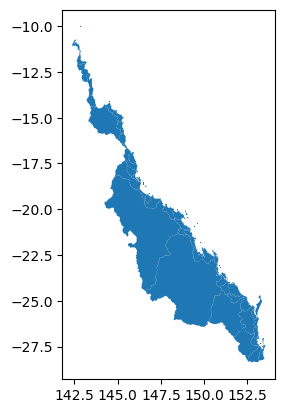

In [9]:
nec_river_regions.plot()

In [27]:
cc_river_regions = river_regions[river_regions['Division'] == 'Carpentaria Coast']
cc_river_regions

RivRegName RivRegNum           Division  \
130           ARCHER-WATSON RIVERS        18  Carpentaria Coast   
131                     WARD RIVER        19  Carpentaria Coast   
132                   EMBLEY RIVER        20  Carpentaria Coast   
133                  WENLOCK RIVER        21  Carpentaria Coast   
134                    DUCIE RIVER        22  Carpentaria Coast   
135                  JARDINE RIVER        23  Carpentaria Coast   
136          TORRES STRAIT ISLANDS        24  Carpentaria Coast   
137                  HOLROYD RIVER        17  Carpentaria Coast   
138                  MORNING INLET        14  Carpentaria Coast   
139         FLINDERS-NORMAN RIVERS        15  Carpentaria Coast   
140                KOOLATONG RIVER         1  Carpentaria Coast   
141               SETTLEMENT CREEK        11  Carpentaria Coast   
142              MORNINGTON ISLAND        12  Carpentaria Coast   
143    NICHOLSON-LEICHHARDT RIVERS        13  Carpentaria Coast   
144                   WALKER RIVER         2  Carpentaria Coast   
145                 GROOTE EYLANDT         3  Carpentaria Coast   
146                    ROPER RIVER         4  Carpentaria Coast   
147                    TOWNS RIVER         5  Carpentaria Coast   
148             LIMMEN BIGHT RIVER         6  Carpentaria Coast   
149                    ROSIE RIVER         7  Carpentaria Coast   
150                 McARTHUR RIVER         8  Carpentaria Coast   
151                 ROBINSON RIVER         9  Carpentaria Coast   
152                  CALVERT RIVER        10  Carpentaria Coast   
189  MITCHELL-COLEMAN RIVERS (QLD)        16  Carpentaria Coast   

                                              geometry  
130  MULTIPOLYGON (((142.32458 -12.93986, 142.32458...  
131  MULTIPOLYGON (((141.90986 -13.03653, 141.90986...  
132  MULTIPOLYGON (((141.89625 -11.95403, 141.89625...  
133  MULTIPOLYGON (((141.97875 -12.05097, 141.97875...  
134  MULTIPOLYGON (((142.27403 -11.11014, 142.27375...  
135  MULTIPOLYGON (((142.52875 -10.68042, 142.52875...  
136  MULTIPOLYGON (((142.12375 -10.01542, 142.12375...  
137  MULTIPOLYGON (((142.04708 -13.80208, 142.04792...  
138  MULTIPOLYGON (((140.54681 -18.24125, 140.54653...  
139  MULTIPOLYGON (((143.27264 -16.55236, 143.27264...  
140  MULTIPOLYGON (((136.07875 -13.48264, 136.07875...  
141  MULTIPOLYGON (((139.29319 -17.35069, 139.29319...  
142  MULTIPOLYGON (((139.25403 -16.22931, 139.25403...  
143  MULTIPOLYGON (((139.67764 -21.07042, 139.67764...  
144  MULTIPOLYGON (((135.61097 -14.53292, 135.61097...  
145  MULTIPOLYGON (((136.69819 -13.61792, 136.69819...  
146  MULTIPOLYGON (((132.76319 -16.55847, 132.76347...  
147  MULTIPOLYGON (((135.59347 -15.04792, 135.59347...  
148  MULTIPOLYGON (((134.56514 -16.35653, 134.56486...  
149  MULTIPOLYGON (((135.78986 -15.09153, 135.78986...  
150  MULTIPOLYGON (((136.44764 -17.33986, 136.44792...  
151  MULTIPOLYGON (((136.45681 -16.41375, 136.45653...  
152  MULTIPOLYGON (((137.29653 -16.07042, 137.29681...  
189  MULTIPOLYGON (((143.41903 -14.45708, 143.41903...

In [12]:
#flood_division = flood_river_regions.dissolve()
#flood_division = flood_division.drop(columns=['RivRegName', 'RivRegNum'])

In [13]:
#flood_division['Division'][0] = 'EAST COAST FLOOD'

In [14]:
#flood_division

In [15]:
#flood_division.plot()

In [16]:
#flood_division.to_file('/g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood.shp')

In [17]:
#!ls /g/data/xv83/dbi599/east-coast-rain/shapefiles/

## Day-by-day rainfall

In [18]:
agcd_file = '/g/data/xv83/agcd-csiro/precip/daily/precip-total_AGCD-CSIRO_r005_20230101-20231231_daily.nc'

In [19]:
ds = xr.open_dataset(agcd_file)

/jobfs/105667558.gadi-pbs/ipykernel_2349201/2674519919.py:10: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


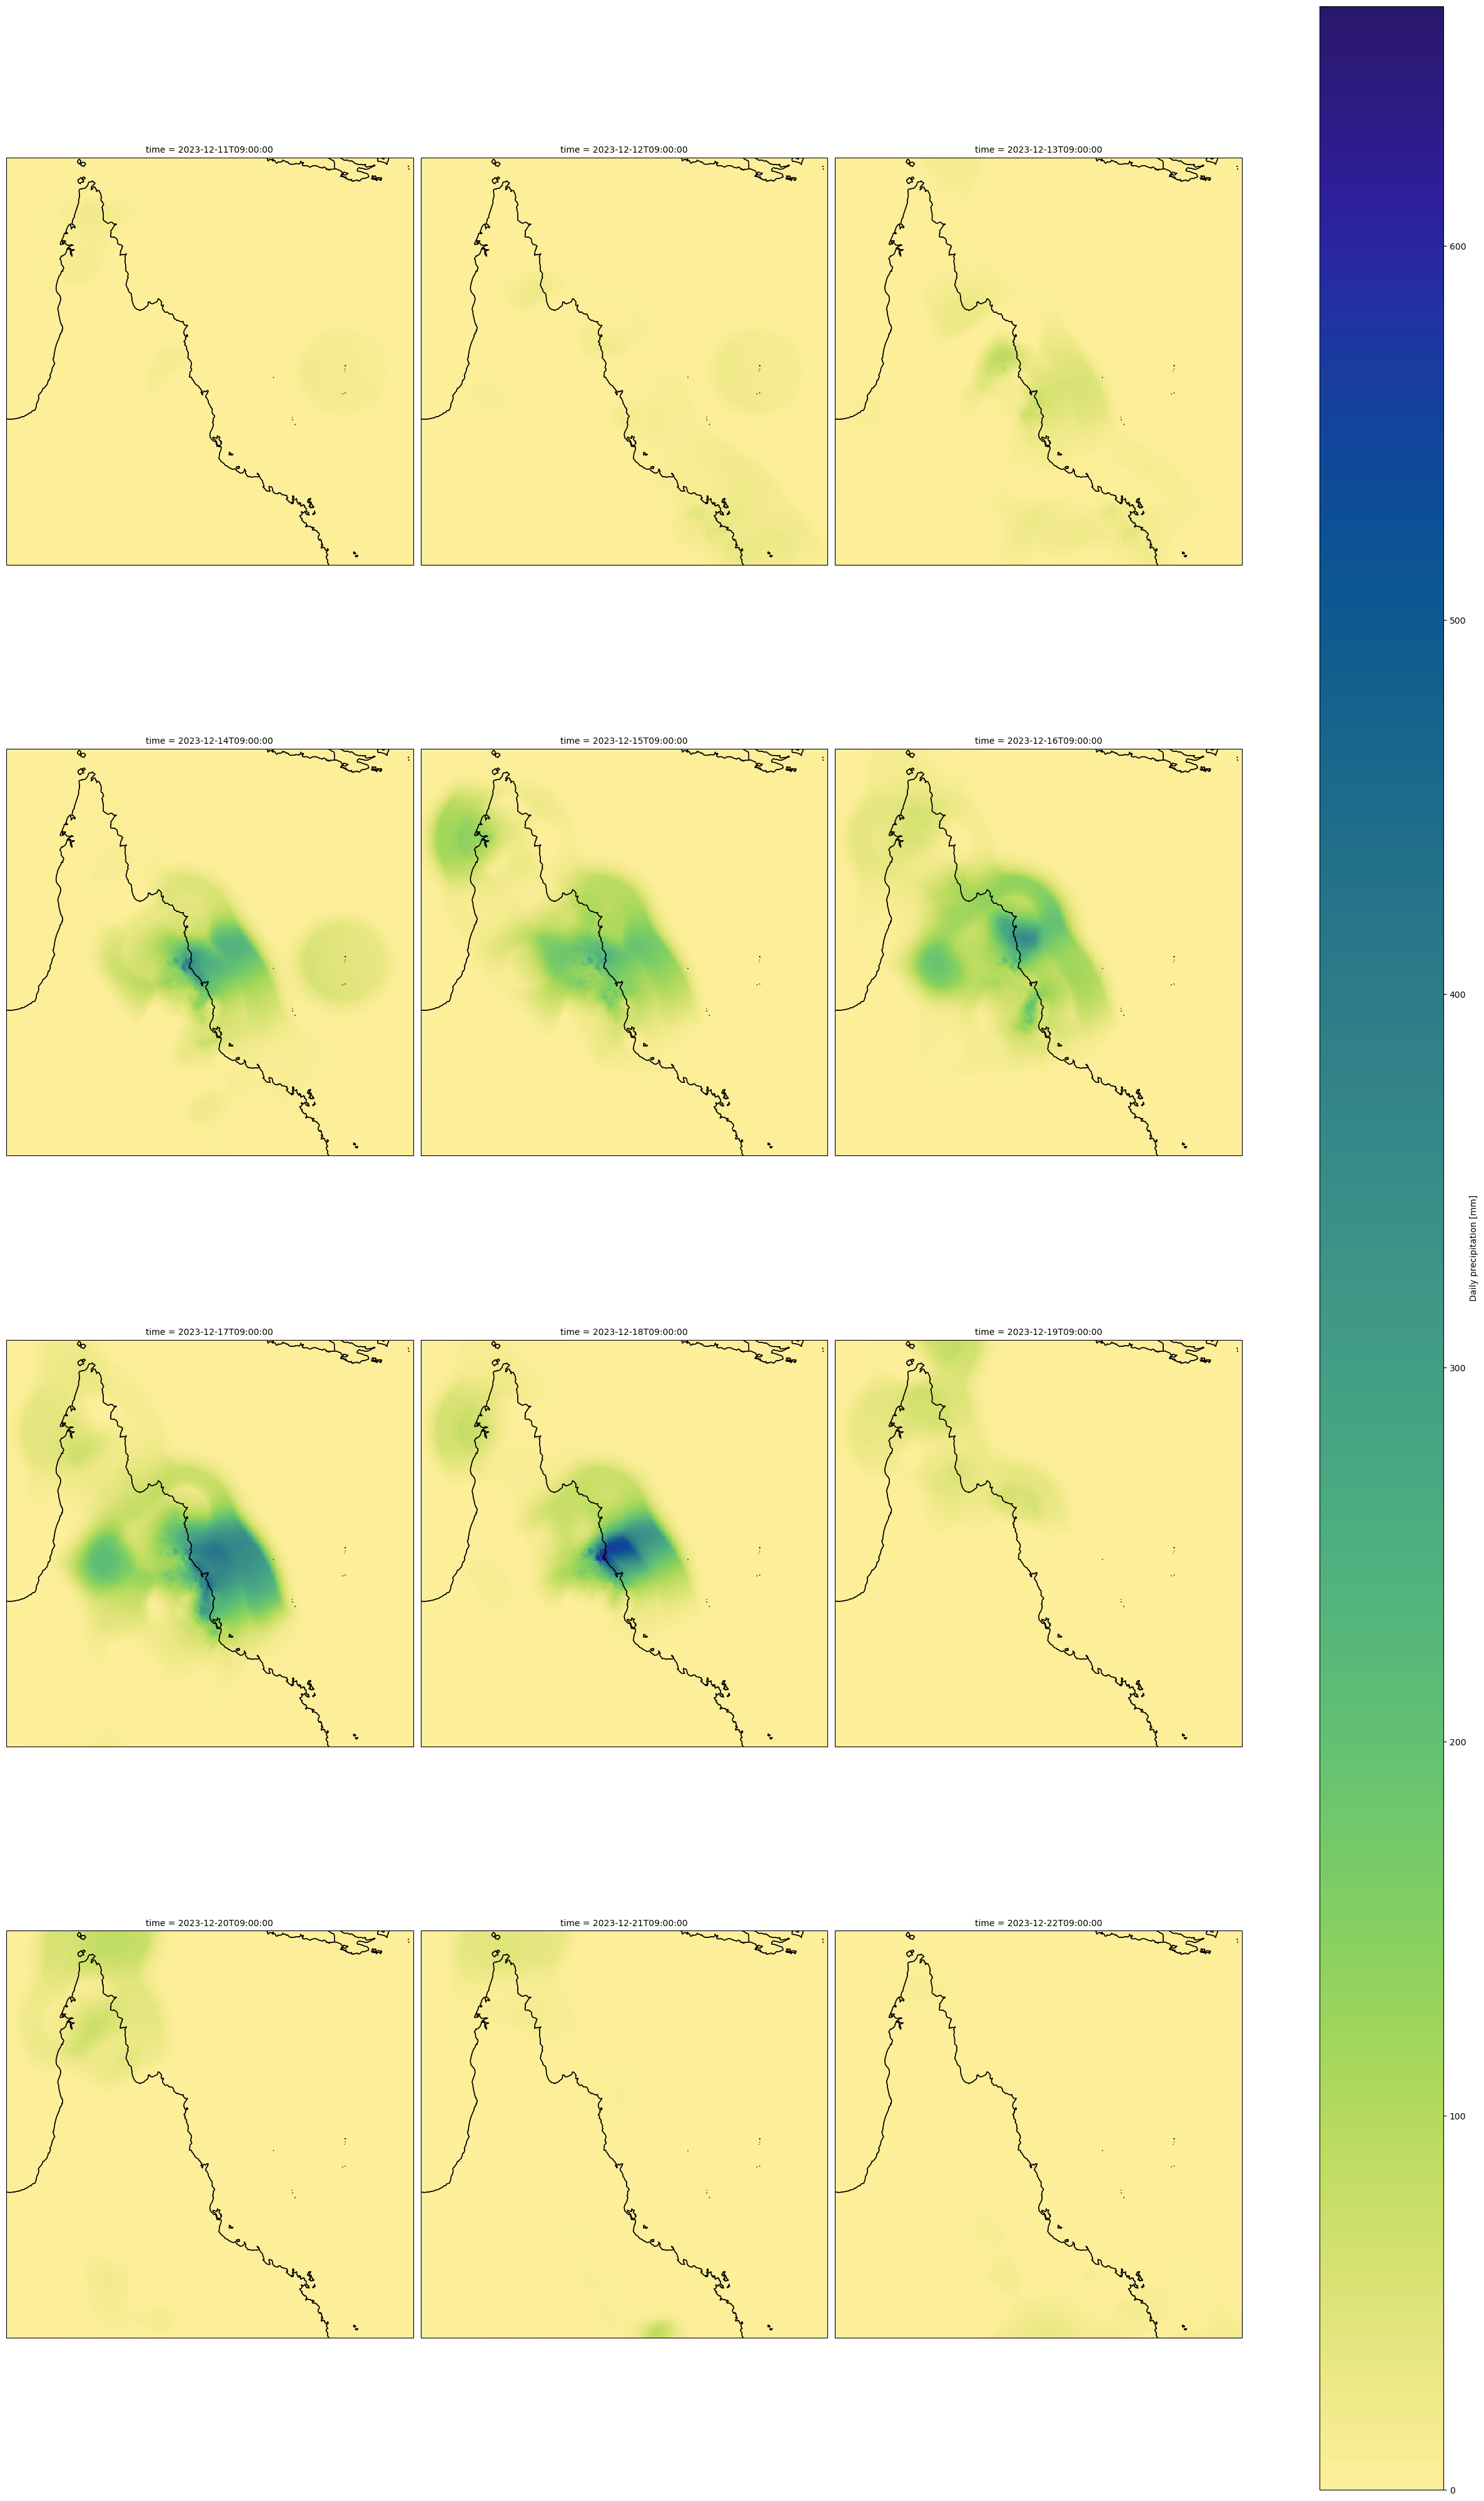

In [45]:
p = ds['precip'].sel(time=slice('2023-12-11', '2023-12-22')).plot(
    col='time',
    col_wrap=3,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    figsize=[25, 40],
    subplot_kws={"projection": ccrs.PlateCarree()},
)

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)
    ax.set_extent([140, 152, -10, -22], crs=ccrs.PlateCarree())

plt.savefig(
    'jasper_day-by-day.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=100
)

## Event summary

In [23]:
ds_masked = fileio.open_dataset(
    agcd_file,
    shapefile='/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/australia/australia.shp'
)
precip_total_masked = ds_masked['precip'].sel(time=slice('2023-12-14', '2023-12-18')).sum(dim=['time'], min_count=1)

In [39]:
def plot_cities(ax, label_color='white'):
    lats = [-16.92, -16.484]
    lons = [145.77, 145.46]
    cities = ['Cairns', 'Port Douglas']
    offsets = {'Cairns': 0.2, 'Port Douglas': 0.2}
    for lon, lat, city in zip(lons, lats, cities):
        ax.plot(lon, lat, 'ro', zorder=5, transform=ccrs.PlateCarree())
        ax.text(
            lon + offsets[city],
            lat,
            city,
            fontsize='large',
            color=label_color,
            transform=ccrs.PlateCarree()
        )

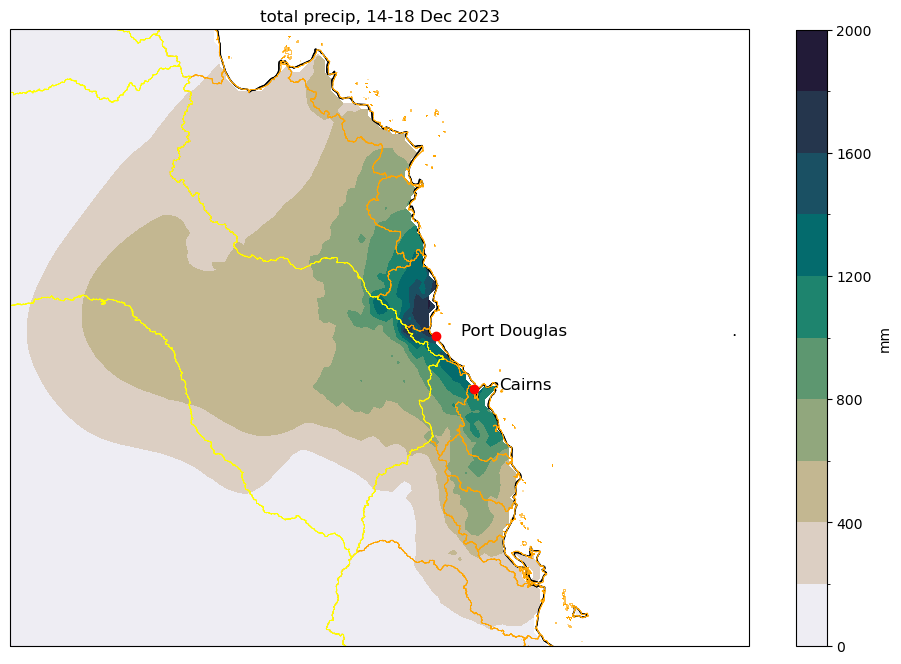

In [43]:
fig = plt.figure(figsize=[12, 8])
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())

pr_levels = np.arange(0, 2001, 200)
cmap = cmocean.cm.rain
# cmocean.cm.haline_r

precip_total_masked.plot.contourf(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=pr_levels,
    cbar_kwargs={'label': 'mm'},
)
ax1.coastlines()
ax1.add_feature(cartopy.feature.STATES)
ax1.add_geometries(nec_river_regions.geometry, ccrs.PlateCarree(), facecolor='none', linewidth=0.5, edgecolor='orange')
ax1.add_geometries(cc_river_regions.geometry, ccrs.PlateCarree(), facecolor='none', linewidth=0.5,  edgecolor='yellow')
ax1.set_extent([142, 148, -14, -19], crs=ccrs.PlateCarree())
plot_cities(ax1, label_color='black')
ax1.set_title('total precip, 14-18 Dec 2023')

plt.savefig(
    'jasper_5day_prtot.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=300
)
plt.show()